In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final/Final_Data.csv/

/content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final/Final_Data.csv


In [ ]:
!ls

Day_Level_Sentiment.csv  Final_Spark.csv  _SUCCESS  TSLA_Yahoo_2018_2020.csv


In [ ]:
import pandas as pd
df= pd.read_csv('Clean_Data.csv')

In [ ]:
df.head()

,user_id_str,created_date,text
0,247611935,2020-06-01,I just got hired at Tesla God is good
1,160589441,2020-06-01,tesla Remastered 2020 Spangle call Lilli lin...
2,578148290,2020-06-01,Tesla Little Suzi via
3,1009977973942964226,2020-06-01,New post \Why Has Tesla Halved The Model Y Del...
4,830407971565867008,2020-06-01,Meaning if you had a million units of Tesla yo...


In [ ]:
df.shape

(3317902, 3)

In [ ]:
import pandas_datareader

In [ ]:
# Import the libs

import math
import pandas_datareader as web #for reading the data
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential #using keras
from keras.layers import Dense, LSTM #importing LSTMs
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') #specfic style of the matplot

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final

/content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final


In [ ]:
!ls

Clean_Data.csv		       spark-3.1.2-bin-hadoop3.2.tgz.1
spark-3.1.2-bin-hadoop3.2      spark-3.1.2-bin-hadoop3.2.tgz.2
spark-3.1.2-bin-hadoop3.2.tgz


Install Spark 

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -v https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz

--2022-04-26 04:15:13--  https://dlcdn.apache.org/spark/spark-3.1.2/spark-3.1.2-bin-hadoop3.2.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228834641 (218M) [application/x-gzip]
Saving to: ‘spark-3.1.2-bin-hadoop3.2.tgz.3’

spark-3.1.2-bin-had 100%[===================>] 218.23M  51.5MB/s    in 4.3s    

2022-04-26 04:15:18 (50.3 MB/s) - ‘spark-3.1.2-bin-hadoop3.2.tgz.3’ saved [228834641/228834641]



In [ ]:
!ls

Clean_Data.csv		       spark-3.1.2-bin-hadoop3.2.tgz.1
spark-3.1.2-bin-hadoop3.2      spark-3.1.2-bin-hadoop3.2.tgz.2
spark-3.1.2-bin-hadoop3.2.tgz  spark-3.1.2-bin-hadoop3.2.tgz.3


#### Untar the Spark installer

In [ ]:
!tar -xvf spark-3.1.2-bin-hadoop3.2.tgz

spark-3.1.2-bin-hadoop3.2/
spark-3.1.2-bin-hadoop3.2/R/
spark-3.1.2-bin-hadoop3.2/R/lib/
spark-3.1.2-bin-hadoop3.2/R/lib/sparkr.zip
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/worker.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/worker/daemon.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/tests/testthat/test_basic.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/shell.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/profile/general.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.Rmd
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/sparkr-vignettes.R
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/doc/index.html
spark-3.1.2-bin-hadoop3.2/R/lib/SparkR/R/
spark-3.1.2-

#### Check the Spark folder after untar

In [ ]:
!ls 

Clean_Data.csv		       spark-3.1.2-bin-hadoop3.2.tgz.1
spark-3.1.2-bin-hadoop3.2      spark-3.1.2-bin-hadoop3.2.tgz.2
spark-3.1.2-bin-hadoop3.2.tgz  spark-3.1.2-bin-hadoop3.2.tgz.3


#### Install findspark - a python library to find Spark

In [ ]:
!pip install -q findspark

#### Set environment variables
Set Java and Spark home based on the location where they are stored

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/drive/Shareddrives/IDS561-BigData/Data/SentiAnalysis_final/spark-3.1.2-bin-hadoop3.2"

#### Create a local Spark session

In [ ]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
from textblob import TextBlob

In [ ]:
from pyspark import SparkContext

In [ ]:
spark = SparkSession.builder.master('Sentiment_Analysis').appName('twitter_reviews').getOrCreate()

In [ ]:
df_spark = spark.read.format("csv").option("multiLine", True).option("header", True).option("escape", "\"").load("Clean_Data.csv") #Loading the csv file into spark

In [ ]:
df_spark.show(10)

+-------------------+------------+--------------------+
|        user_id_str|created_date|                text|
+-------------------+------------+--------------------+
|          247611935|  2020-06-01|I just got hired ...|
|          160589441|  2020-06-01|tesla  Remastered...|
|          578148290|  2020-06-01|Tesla  Little Suz...|
|1009977973942964226|  2020-06-01|"New post \"Why H...|
| 830407971565867008|  2020-06-01|Meaning if you ha...|
|1066400744608284672|  2020-06-01|Stocks Moving Pre...|
|         2607358237|  2020-06-01|Why Has Tesla Hal...|
|          535314446|  2020-06-01|Tesla TSLA soars ...|
|          548832414|  2020-06-01|My grandma called...|
|         3257184469|  2020-06-01|One day I will ow...|
+-------------------+------------+--------------------+
only showing top 10 rows



In [ ]:
df_spark = df_spark.filter("text != ''")

In [ ]:
df_spark.printSchema()

root
 |-- user_id_str: string (nullable = true)
 |-- created_date: string (nullable = true)
 |-- text: string (nullable = true)



In [ ]:
df_spark.createOrReplaceTempView('df_spark')
spark.sql('SELECT * FROM df_spark LIMIT 2').toPandas()

,user_id_str,created_date,text
0,247611935,2020-06-01,I just got hired at Tesla God is good
1,160589441,2020-06-01,tesla Remastered 2020 Spangle call Lilli lin...


In [ ]:
query = '''
SELECT COUNT(*) as cnt
FROM df_spark
GROUP BY df_spark.created_date
ORDER BY cnt DESC
'''
spark.sql(query).show(truncate=50)

+-----+
|  cnt|
+-----+
|45393|
|21155|
|17436|
|16219|
|14018|
|13817|
|13648|
|13490|
|13451|
|13067|
|12775|
|12373|
|11970|
|11515|
|11406|
|11028|
|10970|
|10879|
|10852|
|10573|
+-----+
only showing top 20 rows



In [ ]:
! pip install sparknlp

     |████████████████████████████████| 144 kB 5.1 MB/s 


In [ ]:
from sparknlp.pretrained import PretrainedPipeline
from pyspark.sql.functions import from_unixtime, to_date, year, udf, explode, split, col, length, rank, dense_rank, avg, sum
from pyspark.sql.window import Window
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.stat import Correlation
from pyspark.ml.clustering import BisectingKMeans
from pyspark.ml.evaluation import ClusteringEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud

from textblob import TextBlob

In [ ]:
sentiment = udf(lambda x: TextBlob(x).sentiment[0])
spark.udf.register("sentiment", sentiment)
df_spark = df_spark.withColumn('sentiment',sentiment('text').cast('double'))

In [ ]:
df_spark.show(5)

+-------------------+------------+--------------------+-------------------+
|        user_id_str|created_date|                text|          sentiment|
+-------------------+------------+--------------------+-------------------+
|          247611935|  2020-06-01|I just got hired ...|                0.7|
|          160589441|  2020-06-01|tesla  Remastered...|                0.0|
|          578148290|  2020-06-01|Tesla  Little Suz...|            -0.1875|
|1009977973942964226|  2020-06-01|"New post \"Why H...|0.13636363636363635|
| 830407971565867008|  2020-06-01|Meaning if you ha...|               0.35|
+-------------------+------------+--------------------+-------------------+
only showing top 5 rows



In [ ]:
df_spark.dtypes

[('user_id_str', 'string'),
 ('created_date', 'string'),
 ('text', 'string'),
 ('sentiment', 'double')]

In [ ]:
#Converting created date to datetime
from pyspark.sql.types import DateType
spark_df1 = df_spark.withColumn("date",df_spark['created_date'].cast(DateType()))
#below is the result
spark_df1.select('created_date','date').show(10,False)

+------------+----------+
|created_date|date      |
+------------+----------+
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
|2020-06-01  |2020-06-01|
+------------+----------+
only showing top 10 rows



In [ ]:
spark_df1.dtypes

[('user_id_str', 'string'),
 ('created_date', 'string'),
 ('text', 'string'),
 ('sentiment', 'double'),
 ('date', 'date')]

In [ ]:
spark_df1.show(3)

+-----------+------------+--------------------+---------+----------+
|user_id_str|created_date|                text|sentiment|      date|
+-----------+------------+--------------------+---------+----------+
|  247611935|  2020-06-01|I just got hired ...|      0.7|2020-06-01|
|  160589441|  2020-06-01|tesla  Remastered...|      0.0|2020-06-01|
|  578148290|  2020-06-01|Tesla  Little Suz...|  -0.1875|2020-06-01|
+-----------+------------+--------------------+---------+----------+
only showing top 3 rows



In [ ]:
df_spark = spark_df1.drop('created_date')

In [ ]:
df_spark.show(3)


+-----------+--------------------+---------+----------+
|user_id_str|                text|sentiment|      date|
+-----------+--------------------+---------+----------+
|  247611935|I just got hired ...|      0.7|2020-06-01|
|  160589441|tesla  Remastered...|      0.0|2020-06-01|
|  578148290|Tesla  Little Suz...|  -0.1875|2020-06-01|
+-----------+--------------------+---------+----------+
only showing top 3 rows



In [ ]:
query = '''
SELECT date, AVG(sentiment) AS day_sentiment 
FROM df_spark 
GROUP BY date;
'''
spark.sql(query).show(truncate=50)

AnalysisException: ignored

In [ ]:
df_spark.write.csv('Final_Data.csv', header=True)

In [ ]:
df_spark.show(2)

+-----------+--------------------+---------+----------+
|user_id_str|                text|sentiment|      date|
+-----------+--------------------+---------+----------+
|  247611935|I just got hired ...|      0.7|2020-06-01|
|  160589441|tesla  Remastered...|      0.0|2020-06-01|
+-----------+--------------------+---------+----------+
only showing top 2 rows



In [ ]:
import pandas as pd
df2 = pd.read_csv("Final_Spark.csv", on_bad_lines='skip')


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

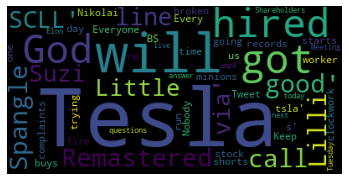

In [ ]:
text = df2['text'].values 

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
df2

,user_id_str,text,sentiment,date
0,247611935,I just got hired at Tesla God is good,0.7,2020-06-01
1,160589441,tesla Remastered 2020 Spangle call Lilli lin...,0.0,2020-06-01
2,578148290,Tesla Little Suzi via,-0.1875,2020-06-01
3,1009977973942964226,"\New post \\\""Why Has Tesla Halved The Model Y...",0.13636363636363635,2020-06-01
4,830407971565867008,Meaning if you had a million units of Tesla yo...,0.35,2020-06-01
...,...,...,...,...
3293610,961027995019264000,The best haiku in the world has only two sylla...,0.5,2018-06-01
3293611,961027995019264000,I love you hot\nI love you steamed\nI love you...,0.4092592592592592,2018-06-01
3293612,366871249,Everyone’s records will be broken one day but ...,-0.4,2018-06-01
3293613,349249475,Every time Tesla stock starts going up The sho...,0.0,2018-06-01


In [ ]:
df2['sentiment'] = df2['sentiment'].astype('str')


In [ ]:
df2['date']

0          2020-06-01
1          2020-06-01
2          2020-06-01
3          2020-06-01
4          2020-06-01
              ...    
3293610    2018-06-01
3293611    2018-06-01
3293612    2018-06-01
3293613    2018-06-01
3293614    2018-06-01
Name: date, Length: 3293615, dtype: object

In [ ]:
df2['sentiment'] = df2['sentiment'].astype('str')
df2['sentiment'] = df2['sentiment'].str.replace('-', '')
df2['sentiment'] = pd.to_numeric(df2['sentiment'], errors='coerce')

In [ ]:
df2.dtypes

user_id_str     object
text            object
sentiment      float64
date            object
dtype: object

In [ ]:
df3 = df2[df2['sentiment'] < 10]


In [ ]:
df3.head()

,user_id_str,text,sentiment,date
0,247611935,I just got hired at Tesla God is good,0.700000,2020-06-01
1,160589441,tesla Remastered 2020 Spangle call Lilli lin...,0.000000,2020-06-01
2,578148290,Tesla Little Suzi via,0.187500,2020-06-01
3,1009977973942964226,"\New post \\\""Why Has Tesla Halved The Model Y...",0.136364,2020-06-01
4,830407971565867008,Meaning if you had a million units of Tesla yo...,0.350000,2020-06-01


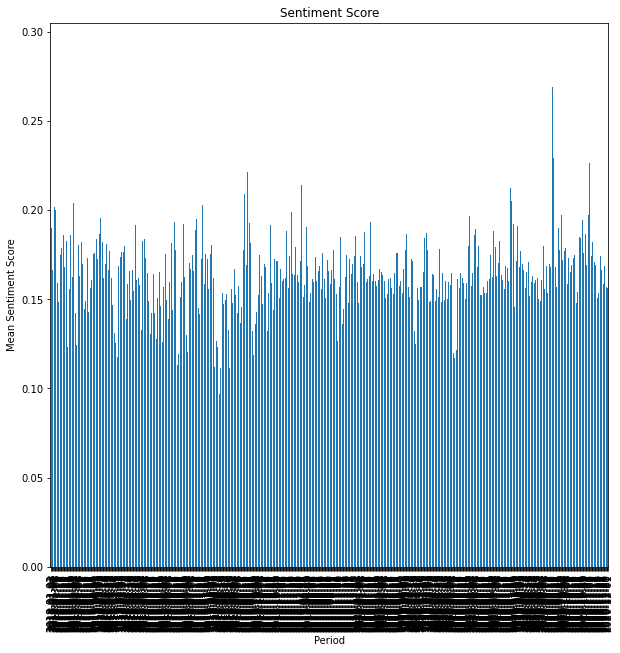

In [ ]:
#generate mean of sentiment_score by period
dfg = df3.groupby(['date'])['sentiment'].mean()
#create a bar plot
dfg.plot(kind='bar', title='Sentiment Score', ylabel='Mean Sentiment Score',
         xlabel='Period', figsize=(10, 10))

In [ ]:
df_day_level_sentiment = df3.groupby('date')['sentiment'].mean()
print(df_day_level_sentiment)

date
2018-01-01    0.290565
2018-01-02    0.190023
2018-01-03    0.166386
2018-01-04    0.136853
2018-01-05    0.182605
                ...   
2020-11-27    0.160950
2020-11-28    0.163688
2020-11-29    0.157156
2020-11-30    0.156137
2020-12-01    0.157687
Name: sentiment, Length: 744, dtype: float64


In [ ]:
df_day_level_sentiment = df_day_level_sentiment.to_frame().reset_index()

In [ ]:
df_day_level_sentiment.head()

,date,sentiment
0,2018-01-01,0.290565
1,2018-01-02,0.190023
2,2018-01-03,0.166386
3,2018-01-04,0.136853
4,2018-01-05,0.182605


In [ ]:
df_day_level_sentiment[df_day_level_sentiment['sentiment'] > 0.29]

,date,sentiment
0,2018-01-01,0.290565


In [ ]:
# Get a series containing maximum value of each column
maxValuesObj = df_day_level_sentiment.max()
print('Maximum value in each column : ')
print(maxValuesObj)

Maximum value in each column : 
date         2020-12-01
sentiment      0.290565
dtype: object


In [ ]:
df_day_level_sentiment[df_day_level_sentiment['date'] == '2018-09-28']

,date,sentiment
270,2018-09-28,0.118826


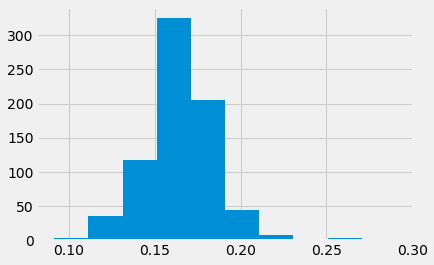

In [ ]:
df_day_level_sentiment['sentiment'].hist()

In [ ]:
# 0.16 as the thresh

In [ ]:
conditions = [
    (df_day_level_sentiment['sentiment'] < 0.16),
    (df_day_level_sentiment['sentiment'] < 1)
    ]

values = [0,1]

df_day_level_sentiment['new_sentiment'] = np.select(conditions, values)

In [ ]:
df_day_level_sentiment['new_sentiment'].value_counts()

1    458
0    286
Name: new_sentiment, dtype: int64

In [ ]:
df_day_level_sentiment.to_csv("Day_Level_Sentiment.csv")